# 5-2.Modeling [Task1]

## 모델링 진행 과정:  
- 10가지 ML 모델의 MSE 검증 결과 비교  
`Linear Regression` , `Lasso` , `Ridge` , `Elastic` , `SVR` , `Regression Tree` , `Random Forest` , `Gradient Boost` , `AdaBoost` , `XGBoost`  
  
---  

- 5-1.Modeling [Task1] 파일에서는 R언어를 활용하여 8가지 모델  
`Linear Regression` , `Lasso` , `Ridge` , `Elastic` , `SVR` , `Regression Tree` , `Random Forest` , `Gradient Boost` 생성 및 성능을 확인  
  
  
- 5-2.Modeling [Task1] 파일에서는 Python언어를 활용하여 2가지 모델(Compas Jupyter 의 R버전에 따른 패키지 호환성 때문에 python으로 진행)  
`AdaBoost` , `XGBoost` 생성 및 성능을 확인 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
#Font
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.unicode_minus']=False

font_fname = '/opt/app-root/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family
#sns.set(font=font_family)

In [2]:
total = pd.read_csv('./data/total_sub.csv',index_col='Unnamed: 0')
total.sample(2)

,accident_cnt,고령인구_count_100,생산가능인구_count_100,신호등_sum,유동인구_sum,유소년인구_count_100,유소년인구_count_200,주정차_count_300,차량등록_count_200,학원수_count_100,...,학구.raw오산원일초통학구역,학구.raw오산초가수초공동통학구역,학구.raw오산초통학구역,학구.raw운산초통학구역,학구.raw운암초통학구역,학구.raw원동초통학구역,학구.raw필봉초통학구역,학구.raw화성초통학구역,정류장_count_200,총인구_count_100
195,5,25,64,3,31.521083,6,24,9,0,0,...,0,0,0,0,0,0,0,0,5,98
84,1,0,366,0,81.903417,6,45,9,0,0,...,0,0,0,0,0,0,0,0,4,383


## __Generate X , Y data__

In [3]:
X = pd.DataFrame(total.drop(['accident_cnt'],axis=1))
Y = pd.Series(total["accident_cnt"])
X.shape , Y.shape

((345, 80), (345,))

## __Train | Test set split__

In [4]:
scaler = StandardScaler()
m_scaler = MinMaxScaler()
X = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2021)
x_train.shape , x_test.shape

((276, 80), (69, 80))

## __Make validator__

In [5]:
my_scorer = make_scorer(mean_squared_error,greater_is_better=False)

kf = KFold(n_splits=10,shuffle=True,random_state=2021)

# 9. AdaBoost Model

In [6]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=200,learning_rate=0.1,loss="linear",random_state=2021)
ada.fit(x_train, y_train)

score = cross_val_score(ada,x_test,y_test,cv=kf,scoring=my_scorer)  
print("AdaBoost(linear) MSE :",score.mean()*(-1))

AdaBoost(linear) MSE : 0.5345846963982313


In [7]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=200,learning_rate=0.1,loss="exponential",random_state=2021)
ada.fit(x_train, y_train)

score = cross_val_score(ada,x_test,y_test,cv=kf,scoring=my_scorer)  
print("AdaBoost(exponential) MSE :",score.mean()*(-1))

AdaBoost(exponential) MSE : 0.47954329369814125


# 10. XGBoost Model

In [8]:
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
xgb_model.fit(x_train,y_train)

score = cross_val_score(xgb_model,x_test,y_test,cv=kf,scoring=my_scorer)  
print("XGBoost MSE :",score.mean()*(-1))

XGBoost MSE : 0.5918947791711247


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

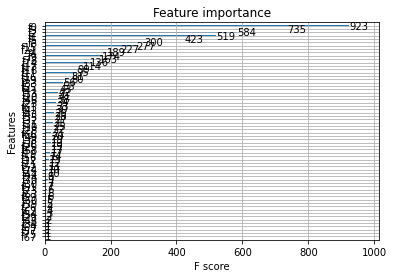

In [9]:
xgboost.plot_importance(xgb_model)

# 전체 모델들의 MSE 비교 시각화

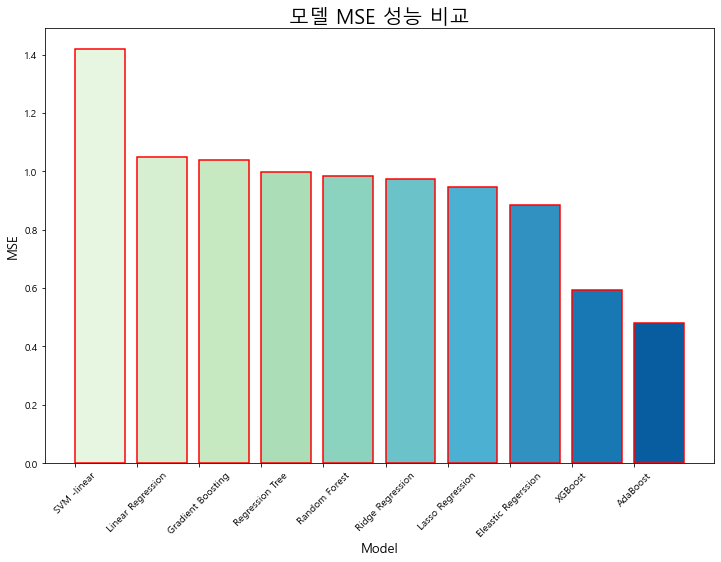

In [4]:
data = [['Linear Regression',1.0499],['Ridge Regression',0.97336],['Lasso Regression', 0.94607],['Eleastic Regerssion',0.88615],
       ['SVM -linear',1.4186],['Regression Tree',0.99607],['Random Forest',0.98421],['Gradient Boosting',1.0391],
       ['AdaBoost',0.47954],['XGBoost', 0.59189]]

df = pd.DataFrame(data,columns=['Model','MSE'])
df = df.sort_values(by='MSE',axis=0,ascending=False)

colors_ = sns.color_palette('GnBu',df.shape[0])
plt.figure(figsize=(12,8))
plt.bar(df.Model,df.MSE, align='edge', color=colors_,edgecolor="red", linewidth=1.5)
plt.xticks(rotation = 45)
plt.title("모델 MSE 성능 비교",fontsize=20)
plt.xlabel("Model",fontsize=13)
plt.ylabel("MSE",fontsize=13)

plt.show()

> ##  MSE가 가장 낮은 `AdaBoost` 모델을 최종 모델로 선정